# A simpler model of Plant Seedling Classification than Transfer Learning with Xception
Because transfer learning was confusing, I'll be trying a simpler model using just keras.

In [1]:
%matplotlib inline
import datetime as dt

# Import plotting for visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16
#from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import numpy as np
import os
import pandas as pd
import pydot
from keras.applications import xception
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
import sys
sys.path.append("/utils/DLWorkspace-Utils/keras-multiprocess-image-data-generator")
import tools.image as T

import keras.backend as K
K.set_image_data_format('channels_last')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Reading in the dataset
First, we locate our data at the correct directories.

In [2]:
data_dir = '/data/kaggle/competitions/plant-seedlings-classification/'
train_dir = os.path.join(data_dir, 'train')
print(train_dir)
test_dir = os.path.join(data_dir, 'test')
#sample_submission = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))

/data/kaggle/competitions/plant-seedlings-classification/train


These are the categories we'll be using:

In [3]:
CATEGORIES = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
NUM_CATEGORIES = len(CATEGORIES)

And the number of files we have per category:

In [4]:
TOTAL_PICS = 0
for category in CATEGORIES:
    print('{} {} images'.format(category, len(os.listdir(os.path.join(train_dir, category)))))
    TOTAL_PICS += len(os.listdir(os.path.join(train_dir, category)))
print("\nTotal Number of images: %s" % TOTAL_PICS)

Black-grass 263 images
Charlock 390 images
Cleavers 287 images
Common Chickweed 611 images
Common wheat 221 images
Fat Hen 475 images
Loose Silky-bent 654 images
Maize 221 images
Scentless Mayweed 516 images
Shepherds Purse 231 images
Small-flowered Cranesbill 496 images
Sugar beet 385 images

Total Number of images: 4750


In [5]:
def read_img_train(filepath, size):
    img = image.load_img(os.path.join(train_dir, filepath), target_size=size)
    img = image.img_to_array(img)
    return img

(224, 224, 3)


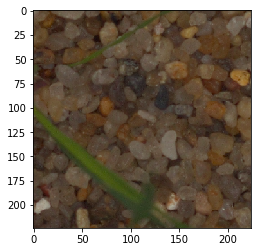

In [8]:
train = np.zeros((TOTAL_PICS, 224, 224, 3))
count = 0
for category_id, category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(train_dir, category)):
        filepath = os.path.join(category, file)
        img = read_img_train(filepath, (224, 224))
        train[count] = img
        count += 1
#train = pd.DataFrame(train, columns=['file', 'category_id', 'category'])
print(train[0].shape)
plt.imshow(train[0]/255)
plt.show()

In [7]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

images_per_class = {}
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    images_per_class[class_label] = []
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        images_per_class[class_label].append(image_bgr)

NameError: name 'load_dataset' is not defined